In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline


In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#Show the whole arrays 
np.set_printoptions(threshold=np.inf)
#Resize matplotlib output
plt.figure(figsize=(20,7))
pd.set_option('display.float_format', lambda x: '%.3f' % x)

<Figure size 1440x504 with 0 Axes>

In [3]:
from collections import Counter

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [4]:

from sklearn.model_selection import StratifiedKFold, learning_curve, GridSearchCV, cross_val_score
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics 


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline  import Pipeline
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix   
from sklearn.decomposition import PCA


import re
from time import time

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer


In [6]:
#laod the data
df = pd.read_csv("C:\\Users\\Jason\\Desktop\\CPSC529\\5.Grad Project\\HCV-Egy-Data.csv")
# Strip the whitespaces from the dataframe header
df.rename(columns=lambda x: x.strip(), inplace=True)

# 1. Inital data exploration

In [7]:
#dataset structure
print(df.shape)

(1385, 29)


In [8]:
#Data structure and feature types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
Age                                1385 non-null int64
Gender                             1385 non-null int64
BMI                                1385 non-null int64
Fever                              1385 non-null int64
Nausea/Vomting                     1385 non-null int64
Headache                           1385 non-null int64
Diarrhea                           1385 non-null int64
Fatigue & generalized bone ache    1385 non-null int64
Jaundice                           1385 non-null int64
Epigastric pain                    1385 non-null int64
WBC                                1385 non-null int64
RBC                                1385 non-null float64
HGB                                1385 non-null int64
Plat                               1385 non-null float64
AST 1                              1385 non-null int64
ALT 1                              1385 non-null int64
ALT4     

In [9]:
#basic statistics
df.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
count,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000,1385.000
mean,46.319,1.490,28.609,1.516,1.503,1.496,1.503,1.499,1.501,1.504,7533.386,4422129.611,12.588,158348.061,82.775,83.916,83.406,83.510,83.709,83.118,83.630,33.438,590951.219,600895.650,288753.612,287660.336,291378.291,9.762,2.536
std,8.782,0.500,4.076,0.500,0.500,0.500,0.500,0.500,0.500,0.500,2668.220,346357.712,1.714,38794.786,25.993,25.923,26.530,26.064,26.206,26.399,26.224,7.074,353935.358,362315.133,285350.675,264559.525,267700.692,4.024,1.121
min,32.000,1.000,22.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2991.000,3816422.000,10.000,93013.000,39.000,39.000,39.000,39.000,39.000,5.000,5.000,5.000,11.000,5.000,5.000,5.000,5.000,3.000,1.000
25%,39.000,1.000,25.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,5219.000,4121374.000,11.000,124479.000,60.000,62.000,61.000,60.000,61.000,61.000,61.000,28.000,269253.000,270893.000,5.000,5.000,5.000,6.000,2.000
50%,46.000,1.000,29.000,2.000,2.000,1.000,2.000,1.000,2.000,2.000,7498.000,4438465.000,13.000,157916.000,83.000,83.000,82.000,84.000,83.000,84.000,83.000,34.000,593103.000,597869.000,234359.000,251376.000,244049.000,10.000,3.000
75%,54.000,2.000,32.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,9902.000,4721279.000,14.000,190314.000,105.000,106.000,107.000,106.000,107.000,106.000,106.000,40.000,886791.000,909093.000,524819.000,517806.000,527864.000,13.000,4.000
max,61.000,2.000,35.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,12101.000,5018451.000,15.000,226464.000,128.000,128.000,128.000,128.000,128.000,128.000,128.000,45.000,1201086.000,1201715.000,3731527.000,808450.000,810333.000,16.000,4.000


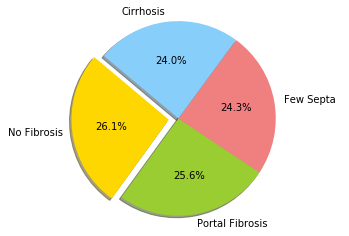

In [10]:
#Check if the target is ballanced


labels = "No Fibrosis","Portal Fibrosis" ,"Few Septa","Cirrhosis"
sizes = df["Baselinehistological staging"].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

# 2. Identifying outliers, missing values, or human error 

In [11]:
#check if there is missing data
print(df.isnull().sum())
print('Total number of NaN in the dataframe: ', df.isnull().sum().sum())

Age                                0
Gender                             0
BMI                                0
Fever                              0
Nausea/Vomting                     0
Headache                           0
Diarrhea                           0
Fatigue & generalized bone ache    0
Jaundice                           0
Epigastric pain                    0
WBC                                0
RBC                                0
HGB                                0
Plat                               0
AST 1                              0
ALT 1                              0
ALT4                               0
ALT 12                             0
ALT 24                             0
ALT 36                             0
ALT 48                             0
ALT after 24 w                     0
RNA Base                           0
RNA 4                              0
RNA 12                             0
RNA EOT                            0
RNA EF                             0
B

### 2.1. Outlier detection 

In [12]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

In [13]:
# list of all column names
list_headers = list(df.columns) 

In [14]:
Outliers_to_drop = detect_outliers(df,1,list_headers)
#prints the outlier recorts
df.loc[Outliers_to_drop] 

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,WBC,RBC,HGB,Plat,AST 1,ALT 1,ALT4,ALT 12,ALT 24,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging


# 3.Understanding the relationship(s), or lack of, between variables 

In [15]:
#list of all categorical features
categorical_vars=["Gender","Fever","Nausea/Vomting","Headache","Diarrhea" ,"Fatigue & generalized bone ache" ,"Jaundice" ,"Epigastric pain","Baselinehistological staging"]

In [16]:
#Cross tabs all categorical variables vs. the target

In [17]:
pd.crosstab( df["Gender"], df["Baselinehistological staging"])

Baselinehistological staging,1,2,3,4
Gender,,,,
1,172,183,162,190
2,164,149,193,172


In [18]:
pd.crosstab( df["Fever"], df["Baselinehistological staging"])

Baselinehistological staging,1,2,3,4
Fever,,,,
1,157,160,167,187
2,179,172,188,175


In [19]:
pd.crosstab( df["Nausea/Vomting"], df["Baselinehistological staging"])

Baselinehistological staging,1,2,3,4
Nausea/Vomting,,,,
1,180,173,165,171
2,156,159,190,191


In [20]:
pd.crosstab( df["Headache"], df["Baselinehistological staging"])

Baselinehistological staging,1,2,3,4
Headache,,,,
1,167,169,181,181
2,169,163,174,181


In [21]:
pd.crosstab( df["Diarrhea"], df["Baselinehistological staging"])

Baselinehistological staging,1,2,3,4
Diarrhea,,,,
1,160,173,178,178
2,176,159,177,184


In [22]:
pd.crosstab( df["Fatigue & generalized bone ache"], df["Baselinehistological staging"])

Baselinehistological staging,1,2,3,4
Fatigue & generalized bone ache,,,,
1,175,159,184,176
2,161,173,171,186


In [23]:
pd.crosstab( df["Jaundice"], df["Baselinehistological staging"])

Baselinehistological staging,1,2,3,4
Jaundice,,,,
1,179,154,182,176
2,157,178,173,186


In [24]:
pd.crosstab( df["Epigastric pain"], df["Baselinehistological staging"])

Baselinehistological staging,1,2,3,4
Epigastric pain,,,,
1,147,168,188,184
2,189,164,167,178


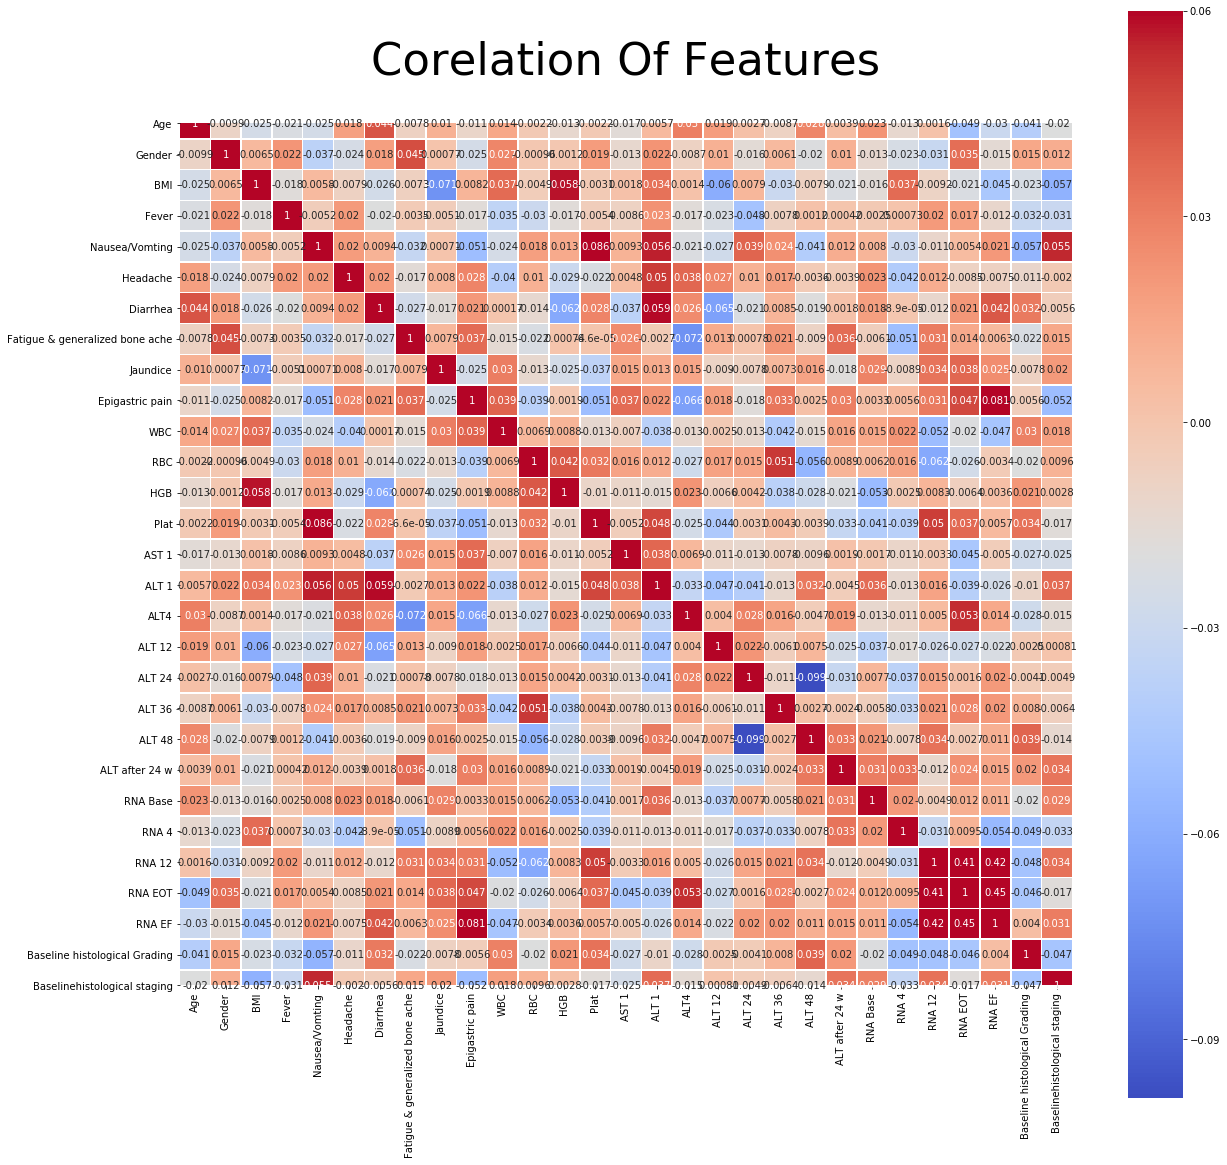

In [25]:
fig, ax = plt.subplots(figsize=(20,20))  
plt.title('Corelation Of Features',y=1.05, size = 45)
_ = sns.heatmap(df.corr(),cmap='coolwarm',vmax = 0.06, square = True, linecolor ='white', annot = True,linewidths = 0.5,ax = ax)


# 4. Preparing the data for modeling

### 4.1. Splitting the data into feature / target matrices 

In [26]:
array = np.array(df.values)

In [27]:
X = array[:,:-1]
y = array[:,-1]

### 4.2. Recoding the data in range (-1;1)

In [28]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

In [29]:
print(X.shape)
print(y.shape)

(1385, 28)
(1385,)


### 4.3. Splitting the data in train test samples for feature selection algorithms

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [31]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((1108, 28), (1108,), (277, 28), (277,))

### 4.4. Feature selection 

In [32]:
clfs_fs = []
ranking_result = []
clfs_fs.append(DecisionTreeClassifier())
clfs_fs.append(LogisticRegression())
clfs_fs.append(RandomForestClassifier())
clfs_fs.append(LinearDiscriminantAnalysis())
 
for clf_ in clfs_fs:
    rfe = RFE(estimator=clf_, step=1)
    rfe = rfe.fit(X_train, y_train)
    ranking_result.append(rfe.ranking_)


In [33]:
list_rank_label = [ 'DecTree_rank',  'LogReg_rank',  'RandForest_rank', 'LDtAnalysis_rank']

In [34]:
x = list(df.columns) 
x = x[:-1]
selected_rfe_features = pd.DataFrame({'Feature': x, list_rank_label[0]:ranking_result[0], list_rank_label[1]:ranking_result[1], 
                                      list_rank_label[2]:ranking_result[2], list_rank_label[3]:ranking_result[3]})

selected_rfe_features.sort_values(by=list_rank_label, inplace = True)
print(selected_rfe_features)


                            Feature  DecTree_rank  LogReg_rank  RandForest_rank  LDtAnalysis_rank
14                            AST 1             1            1                1                 1
15                            ALT 1             1            1                1                 1
20                           ALT 48             1            1                1                 1
22                         RNA Base             1            1                1                 1
0                               Age             1            1                2                 1
26                           RNA EF             1            1                3                 1
16                             ALT4             1            2                1                 2
13                             Plat             1            3                1                 3
10                              WBC             1            4                1                 4
19                  

In [35]:
features_to_remove = selected_rfe_features[(selected_rfe_features.DecTree_rank  > 8) & 
                      (selected_rfe_features.LogReg_rank  > 8) & 
                      (selected_rfe_features.RandForest_rank > 8)&
                      (selected_rfe_features.LDtAnalysis_rank > 8)
                     ]

In [36]:
print(features_to_remove)

    Feature  DecTree_rank  LogReg_rank  RandForest_rank  LDtAnalysis_rank
6  Diarrhea            10           11               14                12
5  Headache            12           13               12                13
3     Fever            13           10               13                10


In [37]:
list_remove_features = features_to_remove.Feature.values.tolist()
print(list_remove_features)

['Diarrhea', 'Headache', 'Fever']


In [38]:
# remove the features
df = df.drop(list_remove_features, axis=1)

In [39]:
 df.shape

(1385, 26)

In [40]:
#Data preparation for modeling after removing all useless features
array = np.array(df.values)
X = array[:,:-1]
y = array[:,-1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)
print(X.shape)
print(y.shape)

(1385, 25)
(1385,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((1108, 25), (1108,), (277, 25), (277,))

### 4.4. Generating basic models results

In [42]:
skf = StratifiedKFold(n_splits=10)
clfs = []
base_scores = []
clfs.append(LogisticRegression(random_state = 11))
clfs.append(KNeighborsClassifier(n_neighbors=5))
clfs.append(RandomForestClassifier(random_state = 11))
clfs.append(DecisionTreeClassifier(random_state = 11))
clfs.append(MLPClassifier(random_state = 11))
clfs.append(SVC(random_state = 11))
clfs.append(LinearDiscriminantAnalysis())
clfs.append(AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = 11)))
clfs.append(ExtraTreesClassifier(random_state = 11))


model_names = ["LogisticRegression" ,
               "KNeighborsClassifier" ,"RandomForestClassifier" ,"DecisionTreeClassifier",
               "MLPClassifier" ,"SVC" ,"LinearDiscriminantAnalysis","AdaBoostClassifier"
                ,"ExtraTreesClassifier"] 

In [43]:
for clf in clfs:
    score = cross_val_score(clf, X, y, cv = skf, scoring = 'accuracy')
    base_scores.append(np.mean(score))
model_accuracy = dict(zip(model_names,base_scores*100))
print(model_accuracy)

{'LogisticRegression': 0.251266812636847, 'KNeighborsClassifier': 0.2606558231675529, 'RandomForestClassifier': 0.23323428213950578, 'DecisionTreeClassifier': 0.2556563444896257, 'MLPClassifier': 0.2418465227817746, 'SVC': 0.2519810238765509, 'LinearDiscriminantAnalysis': 0.25415493692002916, 'AdaBoostClassifier': 0.23393806693775412, 'ExtraTreesClassifier': 0.2426232926702116}


In [44]:
df_accuracy = pd.DataFrame(list(model_accuracy.items()), columns = ['Model','Accuracy']).sort_values('Accuracy', ascending = False)
print(df_accuracy)

                        Model  Accuracy
1        KNeighborsClassifier     0.261
3      DecisionTreeClassifier     0.256
6  LinearDiscriminantAnalysis     0.254
5                         SVC     0.252
0          LogisticRegression     0.251
8        ExtraTreesClassifier     0.243
4               MLPClassifier     0.242
7          AdaBoostClassifier     0.234
2      RandomForestClassifier     0.233


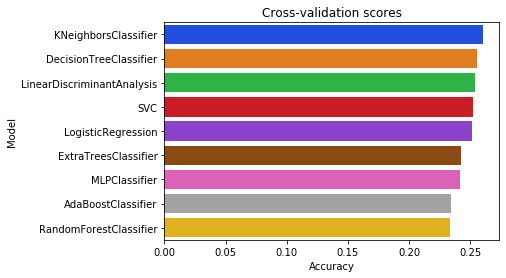

In [45]:
_ = sns.barplot(x ='Accuracy', y ='Model', data = df_accuracy , palette = 'bright')
_.set_xlabel('Accuracy')
_ = _.set_title('Cross-validation scores')

# 5. Hyper parameters tuning with GridSearchCV

In [46]:
#LogisticRegression !!!!
LogReg_param_grid ={'C':[1,5,10,20,25,50,100, 200, 300, 1000]} 

#LinearDiscriminantAnalysis
# NO PARAMETERS TO TUNE!!!!


#ExtraTreesClassifier   
ExTC_param_grid= {"max_depth": range(1,9,2),
                  "max_features": range(1,9,2),
                  "min_samples_split": [2, 3, 9],
                  "min_samples_leaf": [1, 5, 20, 50],
                  #"bootstrap": [False],
                  "n_estimators" :range(200,1001,200),
                  "criterion": ['gini', 'entropy']}




#RandomForestClassifier
RFC_param_grid = {'n_estimators': range(200, 1001, 200),
                  'criterion': ['gini', 'entropy'],
                  'max_features': range(1,9,2),
                  'max_depth': range(1,9,2)} 


#KNeighborsClassifier
KNN_param_grid = {'n_neighbors': range(1,15)}





##AdaBoostClassifier
#ADA_param_grid = {'n_estimators' :range(200,1001,200),
#                  'learning_rate': [0.0001, 0.001, 0.01, 0.1],
#                  'base_estimator__criterion' : ['gini', 'entropy'],
#                  'base_estimator__splitter' : ['best', 'random'],
#                  'base_estimator__max_features': range(1,9,2),
#                  'base_estimator__max_depth': range(1,9,2)}


para_grid = []
para_grid.append(LogReg_param_grid)
para_grid.append(ExTC_param_grid)
#para_grid.append(ADA_param_grid)
para_grid.append(RFC_param_grid)
para_grid.append(KNN_param_grid)




models = []
models.append(LogisticRegression(random_state = 11))
models.append(ExtraTreesClassifier(random_state = 11))
#models.append(AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state = 11),random_state = 11)) # default=DecisionTreeClassifier
models.append(RandomForestClassifier(random_state = 11))
models.append(KNeighborsClassifier())




model_name = []
model_name.append("LogisticRegression")
model_name.append("ExtraTreesClassifier")
#model_name.append("AdaBoostClassifier")
model_name.append("RandomForestClassifier")
model_name.append('KNeighborsClassifier')





In [47]:
#for i in range(len(para_grid)):
#    time1 = time()
#    cv = GridSearchCV(models[i], param_grid =para_grid[i], scoring="accuracy", cv = 10, n_jobs=3, verbose = 1)
#    cv.fit(X_train, y_train)
#    print('Classifier: {}'.format(model_name[i]))
#    print('Model best perameters: {}'.format(cv.best_params_))
#    print("Accuracy: {}".format(cv.best_score_))
#    time2 = time()
#    print('Time: {}'.format(time2-time1))
#    print('='*10)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  89 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Classifier: LogisticRegression
Model best perameters: {'C': 5}
Accuracy: 0.24993447993447995
Time: 1.6166856288909912
Fitting 10 folds for each of 1920 candidates, totalling 19200 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    7.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   41.6s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  3.2min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:  5.3min
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:  8.3min
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed: 11.8min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed: 15.4min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed: 19.3min
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed: 23.3min
[Parallel(n_jobs=3)]: Done 6044 tasks      | elapsed: 27.9min
[Parallel(n_jobs=3)]: Done 7194 tasks      | elapsed: 33.7min
[Parallel(n_jobs=3)]: Done 8444 tasks      | elapsed: 39.3min
[Parallel(n_jobs=3)]: Done 9794 tasks      | elapsed: 47.1min
[Parallel(n_jobs=3)]: Done 11244 tasks      | elapsed: 53.1min
[Parallel(n_jobs=3)]: Done 12794 tasks      | elapsed: 59.5min
[Parallel(

Classifier: ExtraTreesClassifier
Model best perameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Accuracy: 0.25809991809991806
Time: 5467.161043643951
Fitting 10 folds for each of 160 candidates, totalling 1600 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   12.5s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  5.4min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:  8.4min
[Parallel(n_jobs=3)]: Done 1600 out of 1600 | elapsed: 12.6min finished


Classifier: RandomForestClassifier
Model best perameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'n_estimators': 400}
Accuracy: 0.2662244062244062
Time: 757.246068239212
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Classifier: KNeighborsClassifier
Model best perameters: {'n_neighbors': 3}
Accuracy: 0.2608353808353808
Time: 0.6836068630218506


[Parallel(n_jobs=3)]: Done 140 out of 140 | elapsed:    0.6s finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  89 tasks      | elapsed:    1.4s
[Parallel(n_jobs=3)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
Classifier: LogisticRegression
Model best perameters: {'C': 5}
Accuracy: 0.24993447993447995
Time: 1.6166856288909912
==========
Fitting 10 folds for each of 1920 candidates, totalling 19200 fits
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    7.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   41.6s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  1.6min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  3.2min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:  5.3min
[Parallel(n_jobs=3)]: Done 1794 tasks      | elapsed:  8.3min
[Parallel(n_jobs=3)]: Done 2444 tasks      | elapsed: 11.8min
[Parallel(n_jobs=3)]: Done 3194 tasks      | elapsed: 15.4min
[Parallel(n_jobs=3)]: Done 4044 tasks      | elapsed: 19.3min
[Parallel(n_jobs=3)]: Done 4994 tasks      | elapsed: 23.3min
[Parallel(n_jobs=3)]: Done 6044 tasks      | elapsed: 27.9min
[Parallel(n_jobs=3)]: Done 7194 tasks      | elapsed: 33.7min
[Parallel(n_jobs=3)]: Done 8444 tasks      | elapsed: 39.3min
[Parallel(n_jobs=3)]: Done 9794 tasks      | elapsed: 47.1min
[Parallel(n_jobs=3)]: Done 11244 tasks      | elapsed: 53.1min
[Parallel(n_jobs=3)]: Done 12794 tasks      | elapsed: 59.5min
[Parallel(n_jobs=3)]: Done 14444 tasks      | elapsed: 67.5min
[Parallel(n_jobs=3)]: Done 16194 tasks      | elapsed: 76.2min
[Parallel(n_jobs=3)]: Done 18044 tasks      | elapsed: 85.0min
[Parallel(n_jobs=3)]: Done 19200 out of 19200 | elapsed: 91.1min finished
Classifier: ExtraTreesClassifier
Model best perameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Accuracy: 0.25809991809991806
Time: 5467.161043643951
==========
Fitting 10 folds for each of 160 candidates, totalling 1600 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   12.5s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  5.4min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:  8.4min
[Parallel(n_jobs=3)]: Done 1600 out of 1600 | elapsed: 12.6min finished
Classifier: RandomForestClassifier
Model best perameters: {'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'n_estimators': 400}
Accuracy: 0.2662244062244062
Time: 757.246068239212
==========
Fitting 10 folds for each of 14 candidates, totalling 140 fits
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
Classifier: KNeighborsClassifier
Model best perameters: {'n_neighbors': 3}
Accuracy: 0.2608353808353808
Time: 0.6836068630218506
==========
[Parallel(n_jobs=3)]: Done 140 out of 140 | elapsed:    0.6s finished

In [1]:
# Setting up the best parameters for each model

In [48]:
Best_LDA = LinearDiscriminantAnalysis()
Best_KNN = KNeighborsClassifier(n_neighbors= 3)
Best_LogReg = LogisticRegression(C=5)
Best_RFC = RandomForestClassifier(max_features=1, max_depth=1, criterion='gini', n_estimators= 500,)
#Best_ADA = AdaBoostClassifier(random_state = 11, learning_rate= 0.1, n_estimators= 400 , base_estimator = DecisionTreeClassifier(splitter= 'random', criterion='entropy', max_depth = 7, max_features= 3, random_state = 11))
Best_ExTC = ExtraTreesClassifier(max_depth=5, min_samples_leaf= 1, min_samples_split=2, max_features=1, 
                                 criterion='gini', n_estimators=400)

In [49]:
## Fitting the models with the best performing algorithms

In [50]:
LDA_fit = Best_LDA.fit(X_train, y_train)
KNN_fit = Best_KNN.fit(X_train, y_train)
LogReg_fit = Best_LogReg.fit(X_train, y_train)
RFC_fit = Best_RFC.fit(X_train, y_train)
#ADA_fit = Best_ADA.fit(X_train, y_train)
ExTC_fit = Best_ExTC.fit(X_train, y_train)


In [ ]:
##Correlation map of each model prediction results

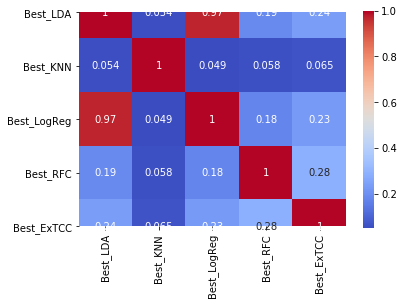

In [51]:
test_Best_LDA = pd.Series(Best_LDA.predict(X_test), name="Best_LDA")
test_Best_KNN = pd.Series(Best_KNN.predict(X_test), name="Best_KNN")
test_Best_LogReg = pd.Series(Best_LogReg.predict(X_test), name="Best_LogReg")
test_Best_RFC = pd.Series(Best_RFC.predict(X_test), name="Best_RFC")
#test_Best_ADA = pd.Series(Best_ADA.predict(X_test), name="Best_ADA")
test_Best_ExTC = pd.Series(Best_ExTC.predict(X_test), name="Best_ExTCC")


ensemble_results = pd.concat([test_Best_LDA,test_Best_KNN,test_Best_LogReg,
test_Best_RFC,test_Best_ExTC],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True, cmap='coolwarm' ,  linecolor ='white',square = True)

# 6. Voting classifier (second level of ensamble modeling)

In [52]:
VotClassifier = VotingClassifier(estimators=[('Best_LDA',Best_LDA),('RFC', Best_RFC),('ExTC',Best_ExTC),('LogReg',Best_LogReg),('KNN',Best_KNN)], voting='soft', n_jobs=3)
model_fit = VotClassifier.fit(X_train, y_train)

In [ ]:
#generating predictions

In [53]:
predictions = model_fit.predict(X_test)

# 7. Model evaluation

In [54]:
matrix = confusion_matrix(y_test, predictions)
print(matrix)

[[15 14 21 16]
 [10 17 27 19]
 [13 12 26 13]
 [22 12 12 28]]


In [55]:
matrix = metrics.classification_report(y_test, predictions)
print(matrix)

              precision    recall  f1-score   support

         1.0       0.25      0.23      0.24        66
         2.0       0.31      0.23      0.27        73
         3.0       0.30      0.41      0.35        64
         4.0       0.37      0.38      0.37        74

    accuracy                           0.31       277
   macro avg       0.31      0.31      0.31       277
weighted avg       0.31      0.31      0.31       277

